Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам:

Тип данных

Интервал дат

Область

Визуализировать выводимые данные с помощью графика

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.style.use('classic')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
def choise(series):
    i = 0
    
    for find in series.unique():
        i += 1
        print(f'{i} \t {find} ')
   
    return 'Выберите нужное значение: '

In [4]:
url="http://sbrfdata.ru/opendata.zip"
data = pd.read_csv(url, compression='zip', encoding='cp1251')
data['date'] = pd.to_datetime(data['date'])

In [5]:
select = int(input(choise(data['name'])))
region = int(input(choise(data['region'])))
date_first = input('Введите дату начала периода в формате ГГГГ ММ ДД\n')
date_second = input('Введите дату конца периода в формате ГГГГ ММ ДД\n')

1 	 Количество заявок на потребительские кредиты 
2 	 Средняя сумма заявки на потребительский кредит 
3 	 Количество заявок на ипотечные кредиты 
4 	 Средняя сумма заявки на ипотечный кредит 
5 	 Количество новых депозитов 
6 	 Средняя сумма нового депозита 
7 	 Средняя зарплата 
8 	 Средняя пенсия 
9 	 В среднем руб. на текущем счете на человека 
10 	 В среднем депозитов в руб. на человека 
11 	 Средние расходы по картам 
12 	 Средний чек в формате Фастфуд 
13 	 Средний чек в формате Ресторан 
14 	 Средние траты в ресторане фастфуд 
15 	 Средние траты в ресторане 


Выберите нужное значение:  11


1 	 Россия 
2 	 Алтайский край 
3 	 Амурская область 
4 	 Архангельская область 
5 	 Астраханская область 
6 	 Белгородская область 
7 	 Брянская область 
8 	 Владимирская область 
9 	 Волгоградская область 
10 	 Вологодская область 
11 	 Воронежская область 
12 	 Еврейская автономная область 
13 	 Забайкальский край 
14 	 Ивановская область 
15 	 Иркутская область 
16 	 Кабардино-Балкарская Республика 
17 	 Калининградская область 
18 	 Калужская область 
19 	 Камчатский край 
20 	 Кемеровская область 
21 	 Кировская область 
22 	 Костромская область 
23 	 Краснодарский край 
24 	 Красноярский край 
25 	 Курганская область 
26 	 Курская область 
27 	 Ленинградская область 
28 	 Липецкая область 
29 	 Магаданская область 
30 	 Москва 
31 	 Московская область 
32 	 Мурманская область 
33 	 Ненецкий автономный округ 
34 	 Нижегородская область 
35 	 Новгородская область 
36 	 Новосибирская область 
37 	 Омская область 
38 	 Оренбургская область 
39 	 Орловская область 
40 	 Пензенская об

Выберите нужное значение:  30
Введите дату начала периода в формате ГГГГ ММ ДД
 2017 01 01
Введите дату конца периода в формате ГГГГ ММ ДД
 2019 12 31


In [6]:
date_first = pd.to_datetime(date_first)
date_second = pd.to_datetime(date_second)
type_name = data['name'].unique()[select - 1]
region_name = data['region'].unique()[region - 1]

In [7]:
info = data[(data['name'] == type_name) & 
     (data['region'] == region_name) &
     (data['date'] >= date_first) & 
     (data['date'] <= date_second)]

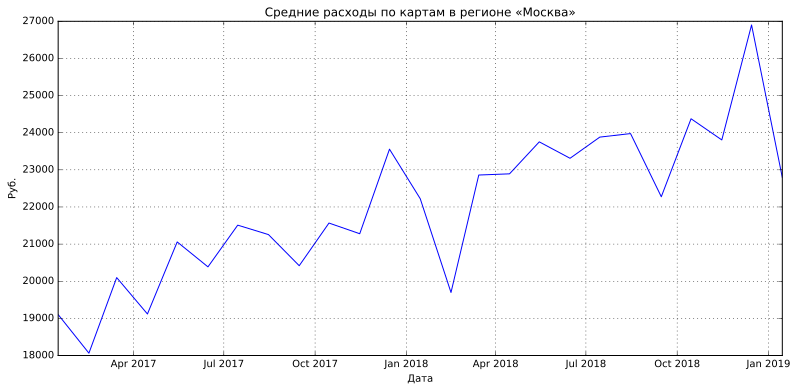

In [8]:
plt.plot(info['date'], info['value'])

#plt.ylim(0,50000)
plt.xlabel('Дата')
plt.ylabel('Руб.')
plt.title(f"{type_name} в регионе «{region_name}»")
plt.grid()
          
plt.show()